In [105]:
import pyodbc
import pandas as pd
import config as cfg

In [106]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
cnxn = pyodbc.connect( 'DRIVER={ODBC Driver 13 for SQL Server};SERVER=' + cfg.mssql['server'] + ';DATABASE=' 
                      + cfg.mssql['database'] + ';UID=' + cfg.mssql['username'] + ';PWD=' + cfg.mssql['password'] )

In [108]:
query = "SELECT * FROM BankView WHERE [State]='TX';"
data = pd.read_sql(query, cnxn, index_col='BankID')
data.head()

,UniqueNum,Name,Address1,Address2,City,State,Zip,Deposit,Lat,Lng,...,MeanPSDistance,PSCount,Take,PDistance,Officers1000,FFLCount,AvgRating,Target,Population,CrimeRate1000
BankID,,,,,,,,,,,,,,,,,,,,,
1,6371,"Austin Bank, Texas National Association",169 S. Frankston Hwy,,Frankston,TX,75763,89823000,32.159764,-95.455885,...,8.073403,2,44911,0.000000,0.000000,3,NaN,None,1163.0,42.13
2,221632,"Austin Bank, Texas National Association",2745 South Loop 256,,Palestine,TX,75801,74868000,31.733813,-95.623431,...,2.158156,1,37434,0.484184,1.772727,6,4.8,None,18194.0,39.13
3,16168,"Capital One, National Association",2121 South Loop 256,,Palestine,TX,75801,105194000,31.735576,-95.612655,...,2.316097,1,52597,0.468390,1.772727,6,NaN,None,18194.0,39.13
4,2196,Citizens National Bank,207 West Spring Street,,Palestine,TX,75801,92886000,31.761967,-95.633062,...,0.134378,1,46443,0.686562,1.772727,6,2.7,None,18194.0,39.13
5,569848,"Commercial Bank of Texas, National Association",109 West Parker St,,Elkhart,TX,75839,33338000,31.625053,-95.579769,...,10.500000,0,16669,0.000000,0.000000,1,5.0,None,NaN,NaN


In [109]:
data['CrimeRate1000'].mean()

36.84859592711564

In [110]:
data['Population'].mean()

598919.9247945695

In [111]:
data.isnull().sum()

UniqueNum               0
Name                    0
Address1                0
Address2                0
City                    0
State                   0
Zip                     0
Deposit                 0
Lat                     8
Lng                     8
ClosestStationID      419
ClosestPSDistance       0
MeanPSDistance          0
PSCount                 0
Take                    0
PDistance               0
Officers1000            0
FFLCount                0
AvgRating            2404
Target               6507
Population            909
CrimeRate1000         909
dtype: int64

In [112]:
values = {'CrimeRate1000': data['CrimeRate1000'].mean(), 'Population': data['Population'].mean(), 'AvgRating' : data['AvgRating'].mean()}
data.fillna(value=values, inplace=True)
data.shape

(6507, 22)

## KMeans

In [113]:
feature_cols = [ 'Take', 'PDistance', 'Officers1000', 'FFLCount', 'AvgRating', 'CrimeRate1000']
X = data[feature_cols]

In [114]:
# calculate SC for K=2 through K=19
k_range = range(2, 20)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X)
    scores.append(metrics.silhouette_score(X, km.labels_))

### The silhouette score measures how close various clusters created are. A higher silhouette score is better as it means that we dont have too many overlapping clusters. This measure has a range of [-1, 1].

In [115]:
scores

[0.99805413984788072,
 0.99522649703455879,
 0.97355769742460652,
 0.97347238772710354,
 0.91342701463640641,
 0.91364407873546472,
 0.75204127891905914,
 0.75122089052835916,
 0.71272020358149069,
 0.6853411076555026,
 0.63310101916300976,
 0.60864216598766652,
 0.60170701646443858,
 0.61114487629054381,
 0.61096401102886655,
 0.57862537646005729,
 0.57707633207822528,
 0.56509271722846666]

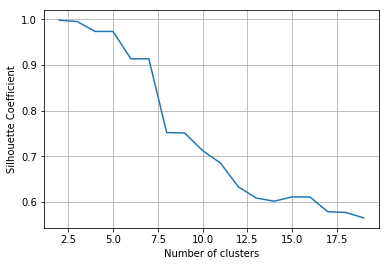

In [116]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

## Try K-Means with 2 clusters

In [117]:
# K-means with 2 clusters is overfit and NOT the best for this data, so try 6
km = KMeans(n_clusters=2, random_state=1)
km.fit(X)
data['cluster'] = km.labels_
data.sort_values('cluster')

,UniqueNum,Name,Address1,Address2,City,State,Zip,Deposit,Lat,Lng,...,PSCount,Take,PDistance,Officers1000,FFLCount,AvgRating,Target,Population,CrimeRate1000,cluster
BankID,,,,,,,,,,,,,,,,,,,,,
1,6371,"Austin Bank, Texas National Association",169 S. Frankston Hwy,,Frankston,TX,75763,89823000,32.159764,-95.455885,...,2,44911,0.000000,0.000000,3,3.708603,None,1.163000e+03,42.130000,0
4345,527927,First United Bank,9801 Indiana Avenue,,Lubbock,TX,79423,18366000,33.504545,-101.887078,...,1,9183,0.084396,0.000000,52,3.200000,None,2.529000e+05,61.090000,0
4344,16900,First United Bank,5802 Fourth Street,,Lubbock,TX,79416,78647000,33.593243,-101.940245,...,2,39323,0.157483,0.000000,35,3.000000,None,2.529000e+05,61.090000,0
4343,12217,First State Bank,One Commerce Park,,Shallowater,TX,79363,85407000,33.677231,-101.984898,...,2,42703,0.591091,2.396932,1,4.000000,None,2.568000e+03,11.290000,0
4342,465834,First National Bank Texas,6315 82nd Street,,Lubbock,TX,79424,1839000,33.516303,-101.955304,...,1,919,0.000000,0.000000,47,3.708603,None,2.529000e+05,61.090000,0
4341,196320,First National Bank Texas,4215 South 289 Loop,,Lubbock,TX,79423,3308000,33.527744,-101.903609,...,1,1654,0.174665,0.000000,69,3.708603,None,2.529000e+05,61.090000,0
4340,196318,First National Bank Texas,702 West Loop 289,,Lubbock,TX,79416,3438000,33.589254,-101.937838,...,2,1719,0.172849,0.000000,39,3.708603,None,2.529000e+05,61.090000,0
4339,465837,First National Bank Texas,1911 4th Street,,Lubbock,TX,79415,3541000,33.591996,-101.858624,...,3,1770,0.620808,1.584158,32,3.708603,None,2.529000e+05,61.090000,0
4338,9243,First Bank & Trust,9816 Slide Road,,Lubbock,TX,79424,455055000,33.503065,-101.923076,...,1,227527,0.000000,0.000000,54,4.000000,None,2.529000e+05,61.090000,0


In [118]:
data_X = X.copy()
data_X['cluster'] = km.labels_
centers = data_X.groupby('cluster').mean()
centers

,Take,PDistance,Officers1000,FFLCount,AvgRating,CrimeRate1000
cluster,,,,,,
0,4.703186e+04,0.425546,1.842720,26.120541,3.708838,36.841775
1,3.439386e+07,0.547267,3.212879,37.666667,3.200000,51.636667


In [119]:
data[data.cluster == 1].cluster.count()

3

## Try K-Means with 6 clusters

In [100]:
# K-means with 2 clusters is overfit and NOT the best for this data, so try 6
km = KMeans(n_clusters=6, random_state=1)
km.fit(X)
data['cluster'] = km.labels_
data.sort_values('cluster')

,UniqueNum,Name,Address1,Address2,City,State,Zip,Deposit,Lat,Lng,...,PSCount,Take,PDistance,Officers1000,FFLCount,AvgRating,Target,Population,CrimeRate1000,cluster
BankID,,,,,,,,,,,,,,,,,,,,,
1,6371,"Austin Bank, Texas National Association",169 S. Frankston Hwy,,Frankston,TX,75763,89823000,32.159764,-95.455885,...,2,44911,0.000000,0.000000,3,3.708603,None,1.163000e+03,42.130000,0
4326,466221,City Bank,5506 4th Street,,Lubbock,TX,79416,60871000,33.592779,-101.932317,...,2,30435,0.203224,1.584158,40,3.000000,None,2.529000e+05,61.090000,0
4325,257854,City Bank,3251 50th Street,,Lubbock,TX,79413,61691000,33.548262,-101.887075,...,1,30845,0.344485,1.584158,61,3.700000,None,2.529000e+05,61.090000,0
4323,443021,City Bank,611 University,,Lubbock,TX,79401,55696000,33.588529,-101.870211,...,3,27848,0.561906,1.584158,43,3.500000,None,2.529000e+05,61.090000,0
4322,469777,City Bank,304 West 1st,,Idalou,TX,79329,44806000,33.666008,-101.683926,...,4,22403,0.678866,1.428571,1,3.708603,None,2.343000e+03,8.540000,0
4321,9877,Centennial Bank,103 Texas Avenue,,Slaton,TX,79364,46379000,33.438392,-101.642222,...,3,23189,0.691630,1.638538,2,5.000000,None,6.061000e+03,21.780000,0
4320,465881,Centennial Bank,7207 82nd Street,,Lubbock,TX,79424,9728000,33.519227,-101.973817,...,1,4864,0.000000,0.000000,45,3.000000,None,2.529000e+05,61.090000,0
4319,443179,Centennial Bank,6602 Quaker Avenue,,Lubbock,TX,79413,38758000,33.533880,-101.907643,...,1,19379,0.191109,0.000000,66,3.000000,None,2.529000e+05,61.090000,0
4318,9099,Centennial Bank,904 Avenue O,,Lubbock,TX,79401,3533000,33.586926,-101.853043,...,3,1766,0.661183,1.584158,31,3.708603,None,2.529000e+05,61.090000,0


## KMeans Centers

In [101]:
data_X = X.copy()
data_X['cluster'] = km.labels_
centers = data_X.groupby('cluster').mean()
centers

,Take,PDistance,Officers1000,FFLCount,AvgRating,CrimeRate1000
cluster,,,,,,
0,3.351823e+04,0.424279,1.834191,25.882592,3.711032,36.764701
1,3.734823e+07,0.520455,3.441114,39.000000,3.500000,56.505000
2,1.338549e+07,0.600560,2.756409,35.000000,3.708603,41.900000
3,2.424650e+06,0.519365,2.291673,42.928571,3.451844,46.424286
4,2.848512e+07,0.600889,2.756409,35.000000,2.600000,41.900000
5,5.223852e+05,0.504443,2.407305,41.357143,3.584396,41.061328


## Results

In [102]:
# Drop columns
dftarget = data[data.cluster >= 0]
dftarget.drop(['UniqueNum', 
       'Deposit', 'Lat', 'Lng', 'ClosestStationID',
       'MeanPSDistance', 'PSCount', 'Target', 'Population'], axis=1, inplace=True)

## Top banks with highest Take/Reward

In [103]:
# Top banks with highest Take
# Centered around cluster 1, 2 ,4
# Mean of 3.734823e+07, 1.338549e+07, 2.848512e+07	
dftop = dftarget[dftarget.cluster.isin([1, 2, 4])].sort_values(by=['Take'], ascending=[False]).head(10)
dftop

,Name,Address1,Address2,City,State,Zip,ClosestPSDistance,Take,PDistance,Officers1000,FFLCount,AvgRating,CrimeRate1000,cluster
BankID,,,,,,,,,,,,,,
3129,"JPMorgan Chase Bank, National Association",712 Main Street,,Houston,TX,77002,0.303064,38696356,0.669694,2.828173,49,4.000000,53.76,1
429,USAA Federal Savings Bank,10750 Mcdermott Freeway,,San Antonio,TX,78288,3.287828,36000101,0.371217,4.054054,29,3.000000,59.25,1
1235,"Bank of America, National Association",901 Main Street,,Dallas,TX,75202,0.991110,28485115,0.600889,2.756409,35,2.600000,41.90,4
1544,"JPMorgan Chase Bank, National Association","1700 Pacific, Ste 125",,Dallas,TX,75201,0.994400,13385486,0.600560,2.756409,35,3.708603,41.90,2
